In [1]:
## Open in iPython
# >ipython notebook
# Charles Kaminski
# charles.kaminski@lexisnexis.com

# This ipython notebook shows an analysis of S-GUIDs generated
#  on a production system

# The S-GUID scheme has both a
#  time component in milliseconds and a random component.
# For the benefit of a more robust analysis, I 
#  separate the time component from the random portion and
#  analyze the random components of all the records together.
# This has the effect of treating all of the GUIDs as if they
#  were generated in the same millisecond and making the analysis
#  comparatively more robust.
# I then run an analysis for GUIDs with a random component of 
#  length 1, then again at length 2, then length 3, and so on up
#  to the full length of the random component of the proposed GUID.

# You will see in the last section that in all cases the ability to predict
#  outcomes holds with a high degree of precision.

# S-GUID's were converted to Hexidecimal for this analysis.

# Aside from pandas, this ipython notebook requires mpmath
#  to calculate probabilites.  This is because some
#  of the calculations with very larger numbers in 
#  the divisor need a large number of decimal places.
# Trying to use a spreadsheet program will result in errors.
#  This is because the divisors are larger than a spreadsheet
#  program can handle.
# For anaconda users:
#  conda install -c https://conda.anaconda.org/anaconda mpmath

import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from mpmath import mp

# Set the decimal precision
mp.dps = 50

# Set graph display to inline
%matplotlib inline  

In [2]:
# Put the file names into path_names dictionary
path_names = {}
for path, dirs, files in os.walk('log_files'):
    if files:
        path_names[path] = files

In [3]:
# Load File content
#  S-GUIDs were converted to Hexidecimal for this analysis
cols = ['Machine', 'Date', 'MS', 'S_GUID', 'UpTime' ]
recs = []
for machine, path in enumerate(path_names):
    file_names = path_names[path]
    for file_name in file_names:
        f = open(path + os.sep + file_name)
        data = f.read().strip()
        data = data.split('\n')
        for r in data:
            r = r.replace('[', ' ').replace(']', ' ')
            r = r.split(',')
            r = [r[0]] + r[1].split()
            r = [x.strip() for x in r]
            r = tuple([int(machine), r[0], int(r[1]), r[5], int(r[6])])
            recs.append(r)
            
df = pd.DataFrame(recs, columns=cols)

In [4]:
df

,Machine,Date,MS,S_GUID,UpTime
0,0,2016-04-01 15:08:47,761,153D33A510E059F8DF46EA07D324AED9,19430
1,0,2016-04-01 15:08:50,508,153D33A5BCCFC32B4914D4D36A5C79DA,22179
2,0,2016-04-01 15:08:55,42,153D33A6D814005DD09E01103A444EEF,26712
3,0,2016-04-01 15:08:55,713,153D33A7021C7014581BD35F2C19922F,27383
4,0,2016-04-01 15:08:57,600,153D33A7780C49A5C27AB95E0FB434D1,29271
5,0,2016-04-01 15:09:00,19,153D33A80F3BCD8B8A6EE554040DA7AA,31689
6,0,2016-04-01 15:09:04,884,153D33A93F4D56BF44097C28BC85DE6C,36555
7,0,2016-04-01 15:09:08,135,153D33AA0A7DD02FB7D6163D521576D9,39806
8,0,2016-04-01 15:09:09,778,153D33AA712BFBE6CF320966B94ECCAB,41449
9,0,2016-04-01 15:09:14,151,153D33AB8277379A3F909D1DB6E09DDE,45822


In [5]:
def get_date_from_sguid(hex_string):
    x = int(hex_string, 16)
    x = x >> 84
    s, ms = divmod(x, 1000)
    return '{}.{:03d}'.format(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(s)), ms)

def get_rand_from_sguid(hex_string):
    x = int(hex_string, 16)
    # int(('0' * 44) +('1' * 84), 2)
    z = 19342813113834066795298815
    rand = x & z
    return hex(rand)[2:-1].zfill(21)

In [6]:
# df['GuidDate'] = df.apply(lambda row: get_date_from_guid(row.Guid), axis=1)
df['S_GUIDDate'] = df.S_GUID.map(get_date_from_sguid)

In [7]:
# df['Rand'] = df.apply(lambda row: get_rand_from_guid(row.Guid), axis=1)
df['Rand'] = df.S_GUID.map(get_rand_from_sguid)

In [8]:
df

,Machine,Date,MS,S_GUID,UpTime,S_GUIDDate,Rand
0,0,2016-04-01 15:08:47,761,153D33A510E059F8DF46EA07D324AED9,19430,2016-04-01 19:08:47.758,059f8df46ea07d324aed9
1,0,2016-04-01 15:08:50,508,153D33A5BCCFC32B4914D4D36A5C79DA,22179,2016-04-01 19:08:50.508,fc32b4914d4d36a5c79da
2,0,2016-04-01 15:08:55,42,153D33A6D814005DD09E01103A444EEF,26712,2016-04-01 19:08:55.041,4005dd09e01103a444eef
3,0,2016-04-01 15:08:55,713,153D33A7021C7014581BD35F2C19922F,27383,2016-04-01 19:08:55.713,c7014581bd35f2c19922f
4,0,2016-04-01 15:08:57,600,153D33A7780C49A5C27AB95E0FB434D1,29271,2016-04-01 19:08:57.600,c49a5c27ab95e0fb434d1
5,0,2016-04-01 15:09:00,19,153D33A80F3BCD8B8A6EE554040DA7AA,31689,2016-04-01 19:09:00.019,bcd8b8a6ee554040da7aa
6,0,2016-04-01 15:09:04,884,153D33A93F4D56BF44097C28BC85DE6C,36555,2016-04-01 19:09:04.884,d56bf44097c28bc85de6c
7,0,2016-04-01 15:09:08,135,153D33AA0A7DD02FB7D6163D521576D9,39806,2016-04-01 19:09:08.135,dd02fb7d6163d521576d9
8,0,2016-04-01 15:09:09,778,153D33AA712BFBE6CF320966B94ECCAB,41449,2016-04-01 19:09:09.778,bfbe6cf320966b94eccab
9,0,2016-04-01 15:09:14,151,153D33AB8277379A3F909D1DB6E09DDE,45822,2016-04-01 19:09:14.151,7379a3f909d1db6e09dde


Rand character 1:


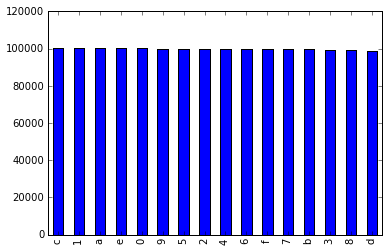

Rand character 2:


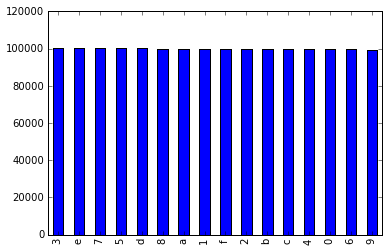

Rand character 3:


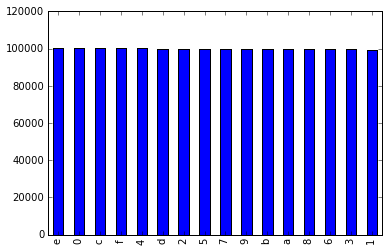

Rand character 4:


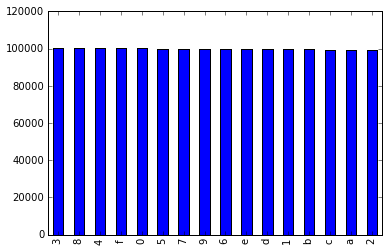

Rand character 5:


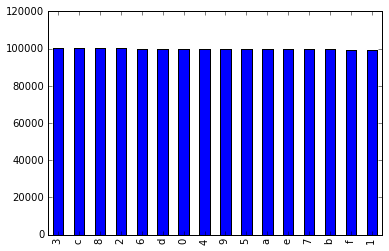

Rand character 6:


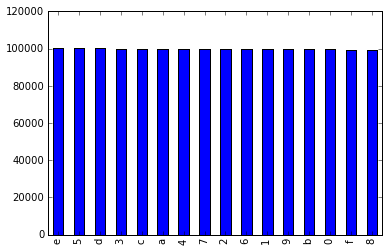

Rand character 7:


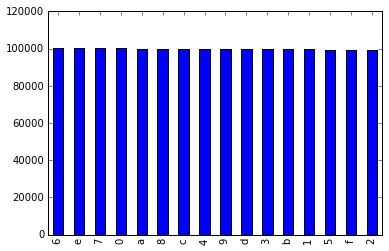

Rand character 8:


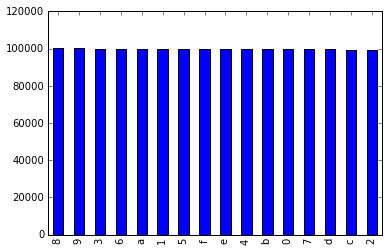

Rand character 9:


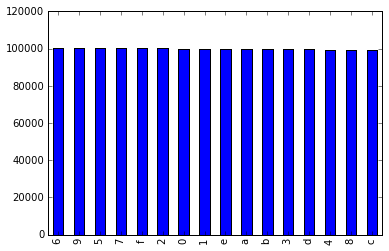

Rand character 10:


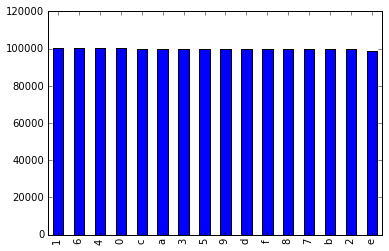

Rand character 11:


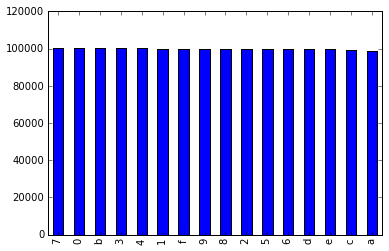

Rand character 12:


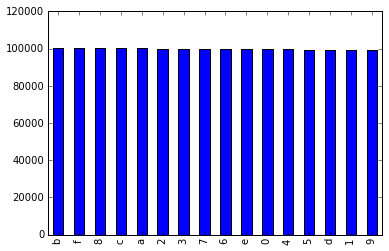

Rand character 13:


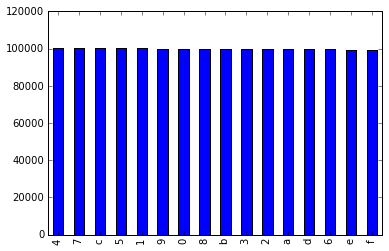

Rand character 14:


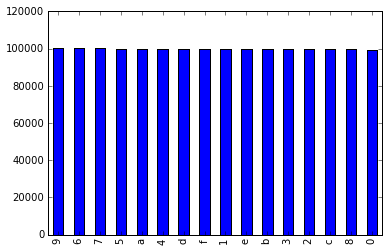

Rand character 15:


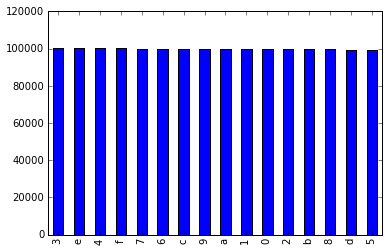

Rand character 16:


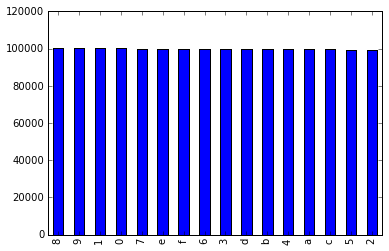

Rand character 17:


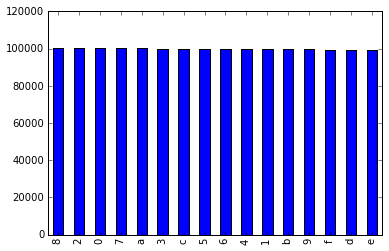

Rand character 18:


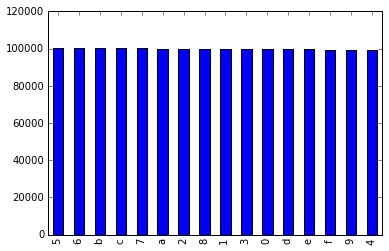

Rand character 19:


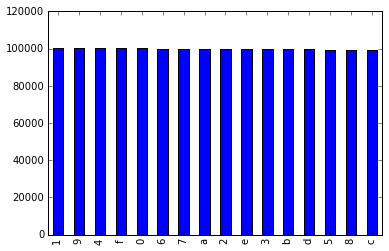

Rand character 20:


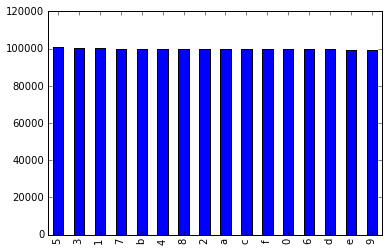

Rand character 21:


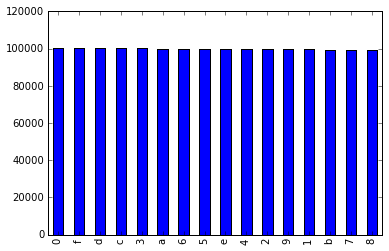

In [9]:
# Confirm each char position of the Rand data is evenly distributed
for i in range(0, 21):
    a = df.Rand.map(lambda s: s[i])
    b = pd.DataFrame(a)
    c = b.Rand.value_counts()
    c.plot(kind='bar')
    print "Rand character %s:" % (i + 1)
    plt.show()

In [10]:
# Show statistics on the count of occurences given a certain
#  length of Rand.
# For example, look at the first character only, then look
#  at the first and second character, etc.  All the way up  
#  to all characters.
for i in range(0, 21):
    a = df.Rand.map(lambda s: s[0:i+1])
    b = pd.DataFrame(a)
    c = b.Rand.value_counts()
    # c.plot(kind='bar')
    # plt.show()
    print '%s Characters' % (i+1)
    print c.describe()
    print '.' * 22

1 Characters
count        16.000000
mean      99803.062500
std         430.071385
min       98702.000000
25%       99630.500000
50%       99841.000000
75%      100146.000000
max      100341.000000
Name: Rand, dtype: float64
......................
2 Characters
count     256.000000
mean     6237.691406
std        83.441670
min      6032.000000
25%      6174.750000
50%      6243.000000
75%      6290.250000
max      6451.000000
Name: Rand, dtype: float64
......................
3 Characters
count    4096.000000
mean      389.855713
std        19.829775
min       325.000000
25%       377.000000
50%       389.000000
75%       403.000000
max       474.000000
Name: Rand, dtype: float64
......................
4 Characters
count    65536.000000
mean        24.365982
std          4.954778
min          7.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         47.000000
Name: Rand, dtype: float64
......................
5 Characters
count    819921.000000
mean          1.

In [11]:
# Calculate projected number of collisions expected
#  given each possible length of Random data
projected = []
n = len(df)

for i in range(1,22):
    k = mp.mpf(16.0)**i
    empty_slots = k * ((1-1/k)**n)
    projected_collision = n - k + empty_slots
    projected.append(int(round(projected_collision)))

In [12]:
# Count the number of actual collisions found given a certain
#  length of Random data
collisions = []
for i in range(0, 21):
    # Look at a certain length of Rand data
    a = df.Rand.map(lambda s: s[0:i+1])
    b = pd.DataFrame(a)
    # Calculate the count of each value
    c = b.Rand.value_counts()
    d = pd.DataFrame(c)
    # Find only those values that had collisions
    e = d[d['Rand'] > 1]
    # Calculate number of collisions
    x = e.Rand.sum() - len(e)
    #x = e.Rand.sum()    
    collisions.append(int(x))

Projected: [1596833, 1596593, 1592753, 1531313, 776951, 73639, 4740, 297, 19, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Actual   : [1596833, 1596593, 1592753, 1531313, 776928, 73770, 4721, 308, 16, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


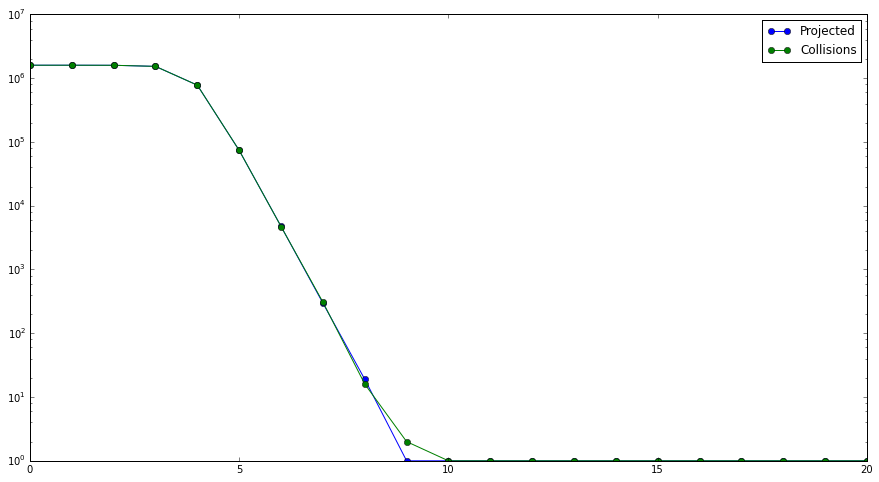

In [13]:
# Plot projected vs acutal collisions
# for each possible length of random data

# Fudge zero's to 1 so they'll show on log scale
c = [x and x or 1 for x in collisions]
p = [x and x or 1 for x in projected]
c = pd.DataFrame(c, columns=['Collisions'])
p = pd.DataFrame(p, columns=['Projected'])
df2 = pd.concat([p,c], axis=1)
df2.plot(logy=True,  marker='o', figsize=(15, 8))

# Show projected vs acutal collisions
# for each possible length of random data
print "Projected: %s" % (projected)
print "Actual   : %s" % (collisions)